Library Import
---

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

import pathlib
import joblib

c:\Users\Muhammad Aulia NF\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Function Declaration
---

In [2]:
# Min-Max Normalization
def MinMax(data):
    data = (data - data.min()) / (data.max() - data.min())
    data = data + 3
    return data

In [3]:
# Normalization (Devided by Sum)
def norm(data):
    recommend = []
    for i in range(len(data)):
        recommend.append(data[i] / sum(data[i]))
    return np.array(recommend)

Read and Split Dataset by column
---

In [6]:
# Location Dataset
ts = pd.read_csv("./Dataset.csv", sep=';', decimal=',')
ts = ts.to_numpy()
ts_head = ts[:,0]
ts_onehot = ts[:,1:6]
ts_rating = ts[:,6]
ts_reviews = ts[:,7]
ts_rate = ts_rating.astype(float)

In [7]:
# Mock User Rating Dataset (For training and test)
ur = pd.read_csv("./Mock_Rating.csv", sep=';')
ur = ur.to_numpy()
ur_head = ur[:,0]
ur_rating = ur[:,1:]
ur_rating.astype(float)
ur_rating.shape

(500, 304)

Preprocessing
---

In [8]:
users = list(ur_head)
Tourist_spot = list(ts_head)
features = ['Art', 'Entertainment', 'Sightings', 'Culinary', 'Shopping']

Getting User Preference

In [9]:
# matrix multiplication to get user preference for each category
users_ts = tf.constant(ur_rating, dtype = tf.float32)
ts_features = tf.constant(ts_onehot, dtype = tf.float32)
users_features = tf.matmul(users_ts, ts_features)

Normalization

In [11]:
# Normalizing user preference
users_pref = tfds.as_numpy(users_features)
users_prefn = norm(users_pref)
users_prefn

array([[0.181893  , 0.26255143, 0.2781893 , 0.22222222, 0.05514403],
       [0.18330465, 0.2745267 , 0.26247847, 0.23666093, 0.04302926],
       [0.17130435, 0.27652174, 0.28608695, 0.22521739, 0.04086956],
       ...,
       [0.18817651, 0.27060783, 0.27144048, 0.2214821 , 0.04829309],
       [0.20109977, 0.2717989 , 0.26551452, 0.21916732, 0.04241948],
       [0.18623784, 0.27599102, 0.26551983, 0.22662678, 0.04562453]],
      dtype=float32)

Matrix Multiplication

In [12]:
ts_rcmnd = []
for i in range(len(users_prefn)) :
    a = []
    for j in range (len(ts_onehot)) :
        a.append(np.dot(users_prefn[i], ts_onehot[j]))
    ts_rcmnd.append(a)

Multiply by Rating

In [13]:
ts_recommend = np.array(ts_rcmnd)
ts_recommend_rate = np.multiply(ts_recommend, ts_rate)
ts_recommend.shape

(500, 304)

Multiply by Min Max Normalized Review Count

In [14]:
ts_reviews = ts_reviews.astype(float)
ts_reviews = MinMax(ts_reviews)
ts_recommend_rate_review = np.multiply(ts_recommend_rate, ts_reviews)
ts_recommend_rate_review.shape

(500, 304)

Convert Rating and List for model

In [15]:
ts_rates = list(ts_rate)
ts_reviewn = list(ts_reviews)

Desired Output
---

In [16]:
# Final Result, depends on user preference, ratings, and number of reviews
Recommend = pd.DataFrame(ts_recommend_rate_review, columns= ts_head)
Recommend

,Garuda Wisnu Kencana Cultural Park,Pandawa Beach,Beachwalk Shopping Center,Pura Tirta Empul,Dimsum jayatir,Melasti Beach Ungasan,Kuta Beach,Bajra Sandhi Monument,Waterbom Bali,Bali Bird Park,...,Es Waneng,Warunk Sebelah,Paon Mak Mo,Warung Danau Batur Mujair Nyatnyat Tabanan,Warung Lonto,Warung Legong Nusa Penida,Warung Panorama,Warung Angels Bilabong,Warung Jukung,Warung The Sorent
0,3.007493,7.394762,4.361563,10.726658,3.202419,11.028478,8.698786,6.469098,3.877173,3.779531,...,3.134487,3.134150,2.944785,3.074999,3.138361,3.136599,10.301618,5.968116,5.976105,6.765892
1,3.030834,7.164935,4.115243,10.692162,3.410494,10.993012,8.467401,6.663951,4.054015,3.951920,...,3.338147,3.337788,3.136119,3.274794,3.342273,3.340397,10.446133,6.293302,6.301727,6.748692
2,2.832416,7.351510,4.485386,10.894087,3.245582,11.200617,8.809637,6.518320,4.083476,3.980640,...,3.176734,3.176392,2.984475,3.116444,3.180660,3.178874,10.637323,6.176980,6.185249,6.913170
3,3.073616,7.482806,4.384748,10.975818,3.121362,11.284648,8.722518,6.691893,4.044154,3.942307,...,3.055149,3.054821,2.870248,2.997167,3.058925,3.057208,10.398315,6.038078,6.046161,6.709836
4,2.929671,7.186877,4.232572,10.689822,3.353408,10.990605,8.614546,6.552730,4.031526,3.929998,...,3.282272,3.281919,3.083626,3.219980,3.286329,3.284484,10.473129,6.225786,6.234120,6.796315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.042551,7.387282,4.321025,10.604507,3.503729,10.902890,8.362609,6.386956,3.762523,3.667769,...,3.429405,3.429036,3.221854,3.364320,3.433644,3.431716,10.444189,6.129943,6.138149,7.013629
496,2.723913,7.176414,4.417471,10.867198,3.328149,11.172972,8.821794,6.555004,4.217601,4.111387,...,3.257550,3.257199,3.060400,3.195726,3.261576,3.259745,10.778830,6.359334,6.367847,6.932069
497,3.111387,7.387283,4.255753,10.839339,3.191753,11.144330,8.617864,6.677823,3.996144,3.895507,...,3.124047,3.123711,2.934977,3.064757,3.127908,3.126152,10.309280,6.058188,6.066298,6.664637
498,3.325066,7.499748,4.162843,10.960886,3.158395,11.269297,8.463000,6.883263,4.013733,3.912653,...,3.091397,3.091064,2.904302,3.032726,3.095218,3.093480,10.214095,6.044354,6.052445,6.553217


Describe Each Column

In [17]:
Recommend.describe()

,Garuda Wisnu Kencana Cultural Park,Pandawa Beach,Beachwalk Shopping Center,Pura Tirta Empul,Dimsum jayatir,Melasti Beach Ungasan,Kuta Beach,Bajra Sandhi Monument,Waterbom Bali,Bali Bird Park,...,Es Waneng,Warunk Sebelah,Paon Mak Mo,Warung Danau Batur Mujair Nyatnyat Tabanan,Warung Lonto,Warung Legong Nusa Penida,Warung Panorama,Warung Angels Bilabong,Warung Jukung,Warung The Sorent
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.030848,7.361197,4.306677,10.890929,3.219531,11.197371,8.660833,6.681134,4.071435,3.968902,...,3.151236,3.150897,2.960520,3.091430,3.155131,3.153359,10.448003,6.144687,6.152912,6.734614
std,0.165315,0.170670,0.149887,0.164298,0.142542,0.168921,0.169434,0.150900,0.122453,0.119370,...,0.139518,0.139503,0.131075,0.136871,0.139691,0.139612,0.158126,0.131063,0.131238,0.147750
min,2.483082,6.786879,3.842350,10.385747,2.831990,10.677975,8.093378,6.195345,3.670897,3.578450,...,2.771915,2.771617,2.604156,2.719308,2.775341,2.773783,10.054347,5.715886,5.723538,6.244615
25%,2.918603,7.248712,4.209023,10.774498,3.118152,11.077664,8.553970,6.583326,3.993286,3.892721,...,3.052007,3.051679,2.867297,2.994084,3.055779,3.054063,10.339705,6.056067,6.064174,6.643775
50%,3.033611,7.367208,4.307763,10.893031,3.213737,11.199533,8.662625,6.684773,4.067134,3.964709,...,3.145564,3.145226,2.955191,3.085866,3.149452,3.147683,10.441787,6.145247,6.153474,6.732912
75%,3.148096,7.480666,4.410502,11.008414,3.315004,11.318162,8.772021,6.781646,4.144613,4.040237,...,3.244683,3.244334,3.048312,3.183104,3.248693,3.246869,10.546262,6.233444,6.241788,6.830517
max,3.570412,7.954343,4.707316,11.299808,3.646657,11.617754,9.099320,7.193252,4.481027,4.368178,...,3.569301,3.568917,3.353284,3.501561,3.573713,3.571706,10.919638,6.514463,6.523184,7.230521


Splitting Training and Test Set
---

Splitting 80% 20%

In [18]:
# Splitting the Mockup Rating data to Train 80% and Test 20%
input = ur_rating
output = ts_recommend_rate_review

x_train, x_test, y_train, y_test = train_test_split(input, output,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

Train & Test Shape

In [19]:
print('x_train : ')
print(x_train.shape)
print('')
print('x_test : ')
print(x_test.shape)
print('')
print('y_train : ')
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.shape)

x_train : 
(400, 304)

x_test : 
(100, 304)

y_train : 
(400, 304)

y_test : 
(100, 304)


Make Machine Learning Model
---

In [174]:
# Making the Machine Learning Model
# Got revised. For more speed, decreased the accuracy a little bit (+ +-0.03 loss)
def create_model(feature):

    feature = np.array(feature)
    
    model = tf.keras.models.Sequential([ 

      tf.keras.layers.InputLayer(input_shape = (304, )),
      tf.keras.layers.Lambda(lambda x: tf.matmul(x, feature)),
      tf.keras.layers.Lambda(lambda x: x / tf.math.reduce_sum(x)),
      tf.keras.layers.Lambda(lambda x: tf.matmul(x, tf.transpose(feature))),
      tf.keras.layers.Dense(304),
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                  loss=tf.keras.losses.MeanAbsoluteError(),
                  )

    return model

Model Summary

In [166]:
# Model Summary
model = create_model(ts_features)

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_61 (Lambda)          (None, 5)                 0         
                                                                 
 lambda_62 (Lambda)          (None, 5)                 0         
                                                                 
 lambda_63 (Lambda)          (None, 304)               0         
                                                                 
 dense_36 (Dense)            (None, 304)               92720     
                                                                 
Total params: 92,720
Trainable params: 92,720
Non-trainable params: 0
_________________________________________________________________


Model Training

In [167]:
# Training the Model
model.fit(x_train, y_train, epochs=500, batch_size=1)

Epoch 1/500
400/400 [==============================] - 0s 756us/step - loss: 4.2762
Epoch 2/500
400/400 [==============================] - 0s 788us/step - loss: 2.2298
Epoch 3/500
400/400 [==============================] - 0s 782us/step - loss: 0.9702
Epoch 4/500
400/400 [==============================] - 0s 851us/step - loss: 0.3032
Epoch 5/500
400/400 [==============================] - 0s 768us/step - loss: 0.1319
Epoch 6/500
400/400 [==============================] - 0s 762us/step - loss: 0.1096
Epoch 7/500
400/400 [==============================] - 0s 759us/step - loss: 0.1093
Epoch 8/500
400/400 [==============================] - 0s 758us/step - loss: 0.1086
Epoch 9/500
400/400 [==============================] - 0s 774us/step - loss: 0.1080
Epoch 10/500
400/400 [==============================] - 0s 760us/step - loss: 0.1076
Epoch 11/500
400/400 [==============================] - 0s 773us/step - loss: 0.1073
Epoch 12/500
400/400 [==============================] - 0s 762us/step - lo

Test Evaluation

In [168]:
# Evaluating the Test set
model.evaluate(x_test, y_test, batch_size=1)

100/100 [==============================] - 0s 586us/step - loss: 0.0121


0.01214918214827776

Plotting Actual vs Prediction

1/1 [==============================] - 0s 19ms/step


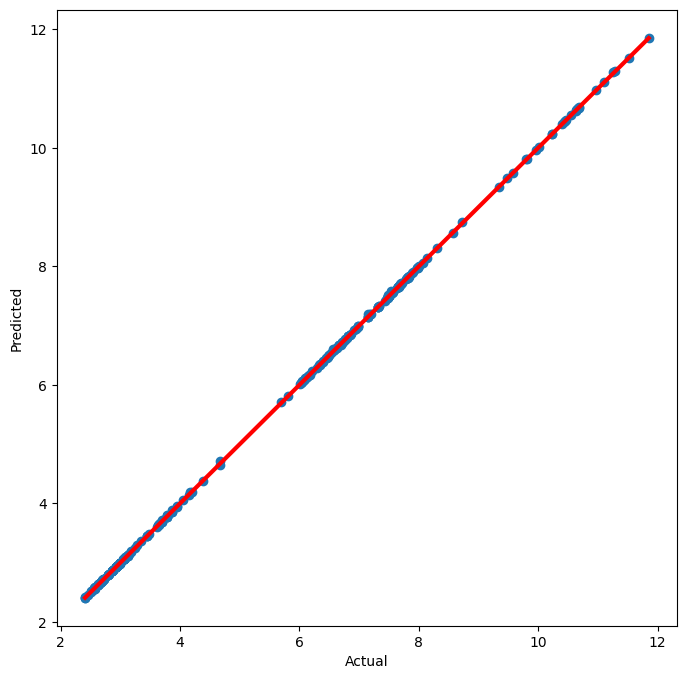

In [175]:
# Actual vs Prediction plotting for 1 example of the test set
row = 3
a = np.expand_dims(ur_rating[row], axis = 0)
predict = model.predict(a)
actual = ts_recommend_rate_review[row]

plt.figure(figsize=(8, 8))
plt.scatter(actual, predict)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], c='r', lw=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [27]:
# output prediction sample
row = 3
a = np.expand_dims(ur_rating[row], axis = 0)
model.predict(a)

1/1 [==============================] - 0s 16ms/step


array([[ 3.0807137,  7.421075 ,  4.3364477, 10.953447 ,  3.1479793,
        11.266319 ,  8.660882 ,  6.710892 ,  4.0588436,  3.96933  ,
         6.4765244,  7.5538473,  6.5771956,  6.557118 ,  7.148052 ,
         6.517296 ,  7.6299267,  6.0766478,  7.724303 ,  6.9258404,
         6.901834 ,  6.4586997,  6.0244546,  7.532959 ,  3.0627048,
         2.7254066,  3.3252804,  3.685831 ,  2.666795 ,  2.7132578,
         3.4701803,  2.7275107,  7.537178 ,  6.129376 ,  7.5247226,
         7.194931 ,  7.6805453,  2.7094913,  6.4076204,  3.6668859,
         7.674119 ,  6.12365  ,  2.7065456,  7.5018725,  9.813687 ,
         2.6982362,  6.670222 ,  6.103333 , 10.677806 ,  2.6137588,
         7.4880877, 10.670792 ,  9.791764 ,  7.656332 ,  9.557818 ,
        10.663085 ,  7.4786572, 10.448227 ,  2.6977293,  9.333981 ,
         7.801935 , 11.225276 , 10.21398  ,  5.82596  ,  6.9719915,
         2.6327546,  7.463649 , 10.4264765,  6.506571 ,  6.2276516,
         7.791466 ,  6.0694175,  3.146582 ,  7.4

Trying Model Evaluation using more realistic data (Validation)
---

Import Validation Data

In [29]:
# Importing the validation dataset
# Validation here is much different from the training and test set
# because it was not a mockup data, but kind of a simulation if we
# do a 2-3 days touring in different places in Bali
ur_val = pd.read_csv("./Validation.csv", sep=';', decimal=',')
ur_val.head()

,Name,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,Garuda Wisnu Kencana Cultural Park,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pandawa Beach,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beachwalk Shopping Center,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pura Tirta Empul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,Dimsum jayatir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Take User Rating

In [30]:
ur_val = np.array(ur_val)
ur_val_t = np.transpose(ur_val)
ur_val_t_rating = ur_val_t[1:,0:]
ur_val_t_rating.astype(float)
ur_val_t_rating.dtype

dtype('O')

Get User Preference

In [31]:
users_ts_val = tf.constant(ur_val_t_rating, dtype = tf.float32)
users_features_val = tf.matmul(users_ts_val, ts_features)

In [32]:
ur_val_t_rating = tfds.as_numpy(users_ts_val)
ur_val_t_rating

array([[0., 0., 0., ..., 0., 3., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 3., 5., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Normalization

In [33]:
users_pref_val = tfds.as_numpy(users_features_val)
users_prefn_val = norm(users_pref_val)
users_prefn_val

array([[0.07777778, 0.3       , 0.5       , 0.12222222, 0.        ],
       [0.23376623, 0.23376623, 0.19480519, 0.32467532, 0.01298701],
       [0.2580645 , 0.20967741, 0.20967741, 0.09677419, 0.22580644],
       [0.        , 0.15      , 0.125     , 0.625     , 0.1       ],
       [0.        , 0.2       , 0.4       , 0.4       , 0.        ],
       [0.44444445, 0.        , 0.2777778 , 0.        , 0.2777778 ],
       [0.36363637, 0.11363637, 0.4318182 , 0.        , 0.09090909],
       [0.20689656, 0.41379312, 0.27586207, 0.        , 0.10344828],
       [0.17857143, 0.17857143, 0.32142857, 0.32142857, 0.        ],
       [0.        , 0.41935483, 0.58064514, 0.        , 0.        ],
       [0.        , 0.15625   , 0.        , 0.84375   , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.05263158, 0.13157895, 0.42105263, 0.28947368, 0.10526316],
       [0.16129032, 0.32258064, 0.29032257, 0.22580644, 0.        ],
       [0.26190478, 0.07142857, 0.

Matrix Multiplication

In [34]:
ts_rcmnd_val = []
for i in range(len(users_prefn_val)) :
    b = []
    for j in range (len(ts_onehot)) :
        b.append(np.dot(users_prefn_val[i], ts_onehot[j]))
    ts_rcmnd_val.append(b)

Multiply by Rating and Normalized Review

In [35]:
ts_recommend_val = np.array(ts_rcmnd_val)
ts_recommend_rate_val = np.multiply(ts_recommend_val, ts_rate)
ts_recommend_rate_review_val = np.multiply(ts_recommend_rate_val, ts_reviews)
ts_recommend_rate_review_val.shape

(45, 304)

Validation Output

In [36]:
# Final result for the Validation set, same method with the Train and Test set
Recommend_val = pd.DataFrame(ts_recommend_rate_review_val, columns= ts_head)
Recommend_val

,Garuda Wisnu Kencana Cultural Park,Pandawa Beach,Beachwalk Shopping Center,Pura Tirta Empul,Dimsum jayatir,Melasti Beach Ungasan,Kuta Beach,Bajra Sandhi Monument,Waterbom Bali,Bali Bird Park,...,Es Waneng,Warunk Sebelah,Paon Mak Mo,Warung Danau Batur Mujair Nyatnyat Tabanan,Warung Lonto,Warung Legong Nusa Penida,Warung Panorama,Warung Angels Bilabong,Warung Jukung,Warung The Sorent
0,1.286010,9.286445,7.839200,13.029592,1.761331,13.396210,11.678482,5.498734,4.430187,4.318619,...,1.723968,1.723782,1.619631,1.691249,1.726098,1.725129,12.451957,5.198037,5.204995,8.412853
1,3.865186,6.888297,3.054234,9.831633,4.678859,10.108269,6.445915,6.805155,3.452093,3.365157,...,4.579607,4.579115,4.302445,4.492693,4.585267,4.582693,10.170429,6.875052,6.884255,7.023717
2,4.266944,7.517872,3.287407,10.055503,1.394602,10.338438,9.418130,6.808204,3.096367,3.018389,...,1.365018,1.364872,1.282406,1.339112,1.366705,1.365938,6.968837,3.772768,3.777819,4.143427
3,0.000000,2.009087,1.959800,4.082056,9.006804,4.196914,5.474288,2.183321,2.215093,2.159309,...,8.815743,8.814796,8.282206,8.648434,8.826640,8.821684,12.151909,9.541133,9.553905,10.140492
4,0.000000,6.429077,6.271360,8.906303,5.764355,9.156903,8.758861,2.911094,2.953458,2.879079,...,5.642076,5.641469,5.300612,5.534998,5.649050,5.645878,13.502122,7.386684,7.396572,10.816525
5,7.348626,11.608056,4.355112,10.720550,0.000000,11.022198,8.110057,6.469099,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750589,0.000000,0.000000,3.755738
6,6.012512,12.785097,6.770219,13.494399,0.000000,13.874096,9.289701,6.946930,1.678101,1.635840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.364794,1.398993,1.400866,5.838465
7,3.420912,7.759231,4.325076,13.308269,0.000000,13.682729,11.577805,9.034431,6.110602,5.956715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.311808,5.094265,5.101084,3.729836
8,2.952573,8.036346,5.039486,10.072605,4.632071,10.356021,7.299051,5.198383,2.637016,2.570606,...,4.533811,4.533324,4.259420,4.447766,4.539415,4.536866,11.091028,6.155570,6.163810,8.691850
9,0.000000,9.332531,9.103587,14.843838,0.000000,15.261504,14.598101,6.103907,6.192734,6.036778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.502121,5.162736,5.169647,7.850703


Define x and y

In [170]:
x_val = ur_val_t_rating
y_val = ts_recommend_rate_review_val

Validation Test

In [176]:
# Evaluate the Validation set, it was less than the test evaluation
# it was higher (around 0.07 loss) before the revision, but took more time. 
# We decided that for practicality, we can sacrifice some accuracy for speed
model.evaluate(x_val, y_val, batch_size=1)

45/45 [==============================] - 0s 680us/step - loss: 0.1043


0.10432105511426926

1/1 [==============================] - 0s 36ms/step


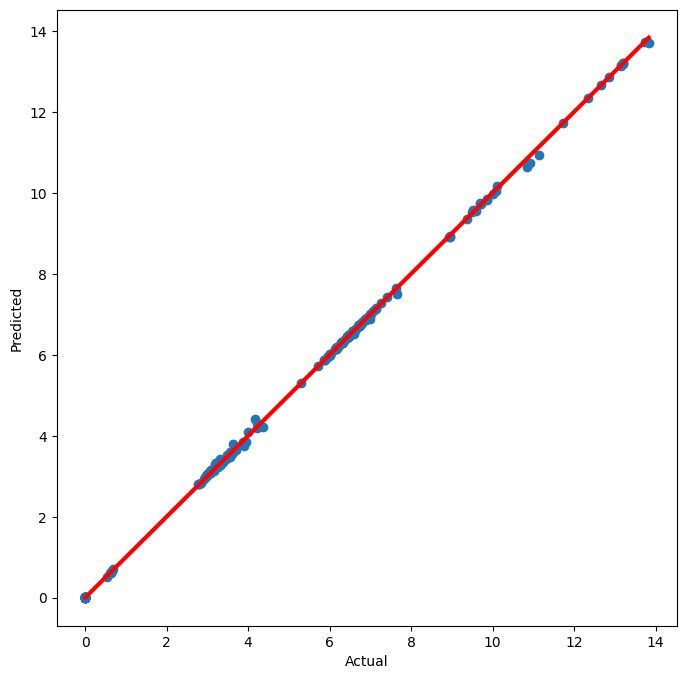

In [172]:
# Actual vs Prediction plotting for 1 example of the validation set
row = 23
a = np.expand_dims(ur_val_t_rating[row], axis = 0)
predict = model.predict(a)
actual = ts_recommend_rate_review_val[row]

plt.figure(figsize=(8, 8))
plt.scatter(actual, predict)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], c='r', lw=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Deploying the Model
---

In [40]:
export_dir = './Model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: ./Model/assets


INFO:tensorflow:Assets written to: ./Model/assets


Choosing Optimization Priority

In [41]:
# Choosing speed for the optimization priority
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

TFLite

In [42]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./Model/model.tflite')
tflite_model_file.write_bytes(tflite_model)

98832

Pickle

In [43]:
joblib.dump(model, './Model/Model.pkl')

['./Model/Model.pkl']

In [44]:
# Ended up saving a lot of extensions, but we only use the .h5 Model
model.save('./Model/Model.h5')

In [45]:
model.save('./Model/Model.keras')

Model History
---

In [92]:
# plotting the train vs test and train vs validation epoch history
# this was the initial model, which turned out to be bad in the validation test
def create_model(feature):

    feature = np.array(feature)
    
    model = tf.keras.models.Sequential([ 

      tf.keras.layers.InputLayer(input_shape = (304, )),
      tf.keras.layers.Lambda(lambda x: tf.matmul(x, feature)),
      tf.keras.layers.GroupNormalization(groups=5),
      tf.keras.layers.Lambda(lambda x: tf.matmul(x, tf.transpose(feature))),
      tf.keras.layers.Dense(304),
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                  loss=tf.keras.losses.MeanAbsoluteError(),                 
                  )

    return model

In [96]:
model = create_model(ts_features)

In [97]:
history_test = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=1,
                    validation_data=[x_test, y_test])

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 5.2742 - val_loss: 4.9596
Epoch 2/50
400/400 [==============================] - 0s 901us/step - loss: 4.3485 - val_loss: 3.5903
Epoch 3/50
400/400 [==============================] - 0s 896us/step - loss: 2.7385 - val_loss: 2.0792
Epoch 4/50
400/400 [==============================] - 0s 894us/step - loss: 1.5905 - val_loss: 1.0616
Epoch 5/50
400/400 [==============================] - 0s 906us/step - loss: 0.6216 - val_loss: 0.3570
Epoch 6/50
400/400 [==============================] - 0s 923us/step - loss: 0.2739 - val_loss: 0.2146
Epoch 7/50
400/400 [==============================] - 0s 919us/step - loss: 0.1604 - val_loss: 0.1346
Epoch 8/50
400/400 [==============================] - 0s 922us/step - loss: 0.1199 - val_loss: 0.1252
Epoch 9/50
400/400 [==============================] - 0s 916us/step - loss: 0.1175 - val_loss: 0.1250
Epoch 10/50
400/400 [==============================] - 0s 902us/step - loss: 0.1173 

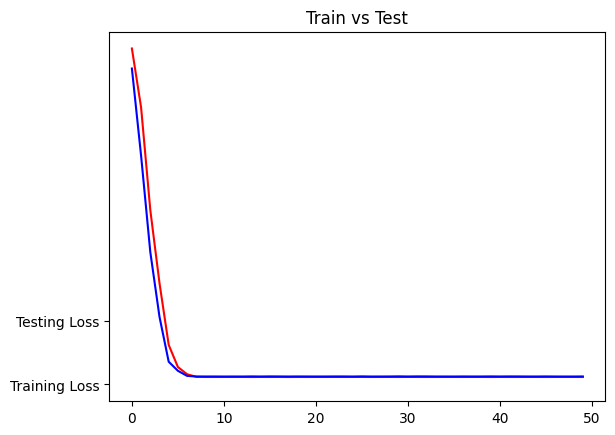

Last Train Loss:  0.1171724870800972
Last Test Loss:  0.12598499655723572


In [98]:
loss=history_test.history['loss']
val_loss=history_test.history['val_loss']

epochs=range(len(loss))

plt.title("Train vs Test")
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Testing Loss")
plt.show()
print("Last Train Loss: ", loss[len(loss)-1])
print("Last Test Loss: ", val_loss[len(loss)-1])

In [99]:
model = create_model(ts_features)

In [100]:
history_val = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=1,
                    validation_data=[x_val, y_val])

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 5.2873 - val_loss: 5.0214
Epoch 2/50
400/400 [==============================] - 0s 850us/step - loss: 4.3686 - val_loss: 3.9460
Epoch 3/50
400/400 [==============================] - 0s 843us/step - loss: 2.7480 - val_loss: 2.9416
Epoch 4/50
400/400 [==============================] - 0s 853us/step - loss: 1.5804 - val_loss: 2.2920
Epoch 5/50
400/400 [==============================] - 0s 864us/step - loss: 0.6094 - val_loss: 1.9893
Epoch 6/50
400/400 [==============================] - 0s 861us/step - loss: 0.2741 - val_loss: 1.9130
Epoch 7/50
400/400 [==============================] - 0s 850us/step - loss: 0.1612 - val_loss: 1.8867
Epoch 8/50
400/400 [==============================] - 0s 860us/step - loss: 0.1201 - val_loss: 1.8869
Epoch 9/50
400/400 [==============================] - 0s 846us/step - loss: 0.1178 - val_loss: 1.8874
Epoch 10/50
400/400 [==============================] - 0s 864us/step - loss: 0.1178 

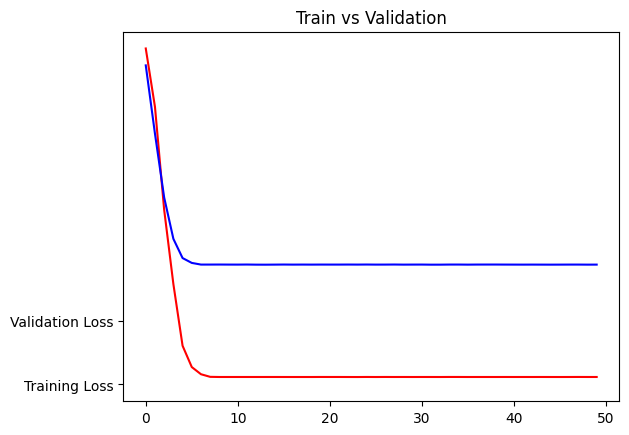

Last Train Loss:  0.11784513294696808
Last Validation Loss:  1.886245846748352


In [101]:
loss=history_val.history['loss']
val_loss=history_val.history['val_loss']

epochs=range(len(loss))

plt.title("Train vs Validation")
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
print("Last Train Loss: ", loss[len(loss)-1])
print("Last Validation Loss: ", val_loss[len(loss)-1])